# Using BMW Dataset To Text Classification

In [1]:
import re
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Creat initial dataset

In [2]:
def load_data(data_dir):
    dataset = pd.DataFrame()
    data = {}
    for split in ["business", "entertainment", "politics", "sport", "tech"] :
        data[split] = []
        path = os.path.join(data_dir, split)
        file_names = os.listdir(path)
        for f_name in file_names :
            with open(os.path.join(path, f_name), "r") as f:
                review = f.read()
                data[split].append([f_name, review, split, f_name+"-"+split])
                
    for split in ["business", "entertainment", "politics", "sport", "tech"] :
        data[split] = pd.DataFrame(data[split], columns=["File_Name", "Content", "Category", "Complete_File"])
        # Creat dataframe for each directory
        dataset = pd.concat([dataset,data[split]])
    return dataset, data

In [3]:
data_dir = r"C:\Users\AD\Desktop\Text Classification\bbc"
df, data= load_data(data_dir)

In [4]:
df.head()

,File_Name,Content,Category,Complete_File
0,001.txt,Ad sales boost Time Warner profit\n\nQuarterly...,business,001.txt-business
1,002.txt,Dollar gains on Greenspan speech\n\nThe dollar...,business,002.txt-business
2,003.txt,Yukos unit buyer faces loan claim\n\nThe owner...,business,003.txt-business
3,004.txt,High fuel prices hit BA's profits\n\nBritish A...,business,004.txt-business
4,005.txt,Pernod takeover talk lifts Domecq\n\nShares in...,business,005.txt-business


## Data Analysis

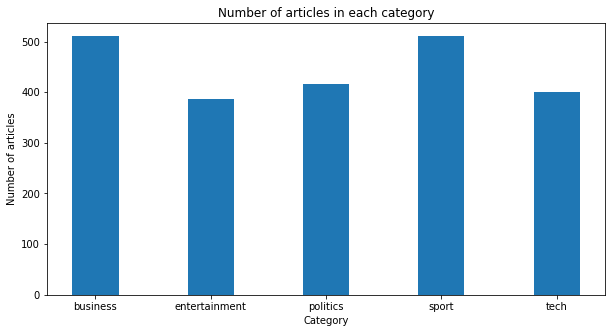

In [5]:
# Show total of each category through bar chart
figure = plt.figure(figsize = (10, 5))

category = ["business", "entertainment", "politics", "sport", "tech"]
values = [data["business"].shape[0], data["entertainment"].shape[0], data["politics"].shape[0], data["sport"].shape[0], data["tech"].shape[0]]

plt.bar(category, values, width=0.4)
plt.xlabel("Category")
plt.ylabel("Number of articles")
plt.title("Number of articles in each category")

plt.show()

In [6]:
import seaborn as sns
sns.set_style("whitegrid")

In [7]:
# see length of each content
df["News_length"] = df["Content"].str.len()

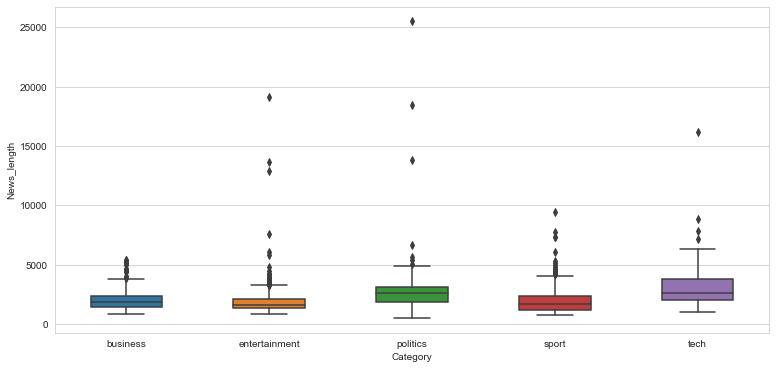

In [8]:
# see length through boxplot
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df, x='Category', y='News_length', width=.5);

In [9]:
quantile_95 = df['News_length'].quantile(0.95)
df_95 = df[df['News_length'] < quantile_95]

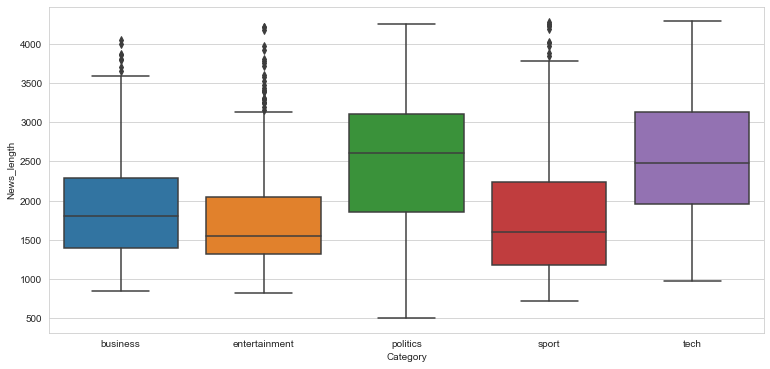

In [10]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df_95, x='Category', y='News_length');

# Feature Engineering

## Text cleaning and preparation

In [11]:
# \r + \n
df['Content_Parsed_1'] = df['Content'].str.replace("\r", " ")
df['Content_Parsed_1'] = df['Content_Parsed_1'].str.replace("\n", " ")
df['Content_Parsed_1'] = df['Content_Parsed_1'].str.replace("    ", " ")

In [12]:
# '' when quoting text
df['Content_Parsed_1'] = df['Content_Parsed_1'].str.replace('""',"")

In [13]:
# lowercasing the text
df['Content_Parsed_2'] = df['Content_Parsed_1'].str.lower()

In [14]:
puntuation_signs = list("?:!.,;")
df['Content_Parsed_3'] = df['Content_Parsed_2']

for punc_sign in puntuation_signs:
    df['Content_Parsed_3'] = df['Content_Parsed_3'].str.replace(punc_sign,"")

In [15]:
# Possessive pronouns
df['Content_Parsed_4'] = df['Content_Parsed_3'].str.replace("'s", "")

In [16]:
import pickle
import nltk

#Downloading punkt and wordnet from NLTK
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
from nltk.stem import WordNetLemmatizer
# Saving the lemmatier into an object
wordnet_lemmatizer = WordNetLemmatizer()

In [21]:
def convert_list_to_words(row) :
    text = df.loc[row]['Content_Parsed_4'].str.split(" ")
    text_list = text.values.tolist()
    text_words = []
    for lis in text_list :
        text_words = text_words + lis
    return text_words

In [ ]:
nrows = len(df)
lemmatized_text_list = []

for row in range(0, nrows):
    
    # Create an empty list containing lemmatized words
    lemmatized_list = []
    
    # Save the text and its words into an object
    text_words = convert_list_to_words(row)
    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    
    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)

In [22]:
# Downloading stop words list
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))

In [24]:
df['Content_Parsed_5'] = df['Content_Parsed_4']

for stop_word in stop_words :
    regex_stopword = r"\b" + stop_word + r"\b"
    df['Content_Parsed_5'] = df['Content_Parsed_5'].str.replace(regex_stopword,'')

In [25]:
# New dataframe
list_columns = ["File_Name", "Category", "Complete_File", "Content", "Content_Parsed_5"]
df = df[list_columns]

df = df.rename(columns={'Content_Parsed_5': 'Content_Parsed'})

In [26]:
df.head()

,File_Name,Category,Complete_File,Content,Content_Parsed
0,001.txt,business,001.txt-business,Ad sales boost Time Warner profit\n\nQuarterly...,ad sales boost time warner profit quarterly p...
1,002.txt,business,002.txt-business,Dollar gains on Greenspan speech\n\nThe dollar...,dollar gains greenspan speech dollar hit ...
2,003.txt,business,003.txt-business,Yukos unit buyer faces loan claim\n\nThe owner...,yukos unit buyer faces loan claim owners em...
3,004.txt,business,004.txt-business,High fuel prices hit BA's profits\n\nBritish A...,high fuel prices hit ba profits british airwa...
4,005.txt,business,005.txt-business,Pernod takeover talk lifts Domecq\n\nShares in...,pernod takeover talk lifts domecq shares uk ...


## Label coding

In [27]:
category_codes = {
    'business': 0,
    'entertainment': 1,
    'politics': 2,
    'sport': 3,
    'tech': 4
}

In [28]:
# Category mapping
df['Category_Code'] = df['Category']
df = df.replace({'Category_Code':category_codes})

## Train-Test Split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Content_Parsed'], 
                                                    df['Category_Code'], 
                                                    test_size=0.15, 
                                                    random_state=8)

## Text Presentation

In [30]:
# Parameter Selection
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)


(1891, 300)
(334, 300)


In [32]:
from sklearn.feature_selection import chi2
import numpy as np

for Product, category_id in sorted(category_codes.items()):
    features_chi2 = chi2(features_train, labels_train == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-5:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

# 'business' category:
  . Most correlated unigrams:
. prices
. economy
. bank
. growth
. oil
  . Most correlated bigrams:
. last year
. year old

# 'entertainment' category:
  . Most correlated unigrams:
. films
. star
. award
. awards
. film
  . Most correlated bigrams:
. mr blair
. prime minister

# 'politics' category:
  . Most correlated unigrams:
. tory
. blair
. election
. party
. labour
  . Most correlated bigrams:
. prime minister
. mr blair

# 'sport' category:
  . Most correlated unigrams:
. side
. game
. season
. match
. cup
  . Most correlated bigrams:
. said mr
. year old

# 'tech' category:
  . Most correlated unigrams:
. digital
. technology
. computer
. software
. users
  . Most correlated bigrams:
. year old
. said mr



In [33]:
# X_train
with open('X_train.pickle', 'wb') as output:
    pickle.dump(X_train, output)
    
# X_test
with open('X_test.pickle', 'wb') as output:
    pickle.dump(X_test, output)
    
# y_train
with open('y_train.pickle', 'wb') as output:
    pickle.dump(y_train, output)
    
# y_test
with open('y_test.pickle', 'wb') as output:
    pickle.dump(y_test, output)
    
# df
with open('df.pickle', 'wb') as output:
    pickle.dump(df, output)
    
# features_train
with open('features_train.pickle', 'wb') as output:
    pickle.dump(features_train, output)

# labels_train
with open('labels_train.pickle', 'wb') as output:
    pickle.dump(labels_train, output)

# features_test
with open('features_test.pickle', 'wb') as output:
    pickle.dump(features_test, output)

# labels_test
with open('labels_test.pickle', 'wb') as output:
    pickle.dump(labels_test, output)
    
# TF-IDF object
with open('tfidf.pickle', 'wb') as output:
    pickle.dump(tfidf, output)